# Task 3


In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [61]:
url = "flight.csv"

In [62]:
df = pd.read_csv(url, index_col=0)

In [63]:
df.head()

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest
0,2013-1-1 05:40:00,2013-1-1 05:42:00,2013-1-1 09:23:00,2013-1-1 08:50:00,1141,JFK,MIA
1,2013-1-1 06:00:00,2013-1-1 05:54:00,2013-1-1 08:12:00,2013-1-1 08:37:00,461,LGA,ATL
2,2013-1-1 05:58:00,2013-1-1 05:54:00,2013-1-1 07:40:00,2013-1-1 07:28:00,1696,EWR,ORD
3,2013-1-1 06:00:00,2013-1-1 05:55:00,2013-1-1 09:13:00,2013-1-1 08:54:00,507,EWR,FLL
4,2013-1-1 06:00:00,2013-1-1 05:57:00,2013-1-1 08:38:00,2013-1-1 08:46:00,79,JFK,MCO


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121427 entries, 0 to 123983
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   datetime_val    121427 non-null  object
 1   dep_time        121427 non-null  object
 2   arr_time        121427 non-null  object
 3   sched_arr_time  121427 non-null  object
 4   flight          121427 non-null  int64 
 5   origin          121427 non-null  object
 6   dest            121427 non-null  object
dtypes: int64(1), object(6)
memory usage: 7.4+ MB


## Convert the columns: 
datetime_val, dep_time, arr_time and sched_arr_time to datetime type within the dataframe.

In [65]:
df['datetime_val'] = pd.to_datetime(df['datetime_val'], errors='coerce') 
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], errors='coerce')
#or use errors='coerce' to put a NaT value (NaT = dummy var for missing value)

Here we can see that the type of the dataframes has changed from object to datetime since last we used the info-method

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121427 entries, 0 to 123983
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   datetime_val    121427 non-null  datetime64[ns]
 1   dep_time        121421 non-null  datetime64[ns]
 2   arr_time        121379 non-null  datetime64[ns]
 3   sched_arr_time  121427 non-null  datetime64[ns]
 4   flight          121427 non-null  int64         
 5   origin          121427 non-null  object        
 6   dest            121427 non-null  object        
dtypes: datetime64[ns](4), int64(1), object(2)
memory usage: 7.4+ MB


### Calculating: air time, delay, delay as a percent

#### Air time
Some flights go past midnight as well, but the dataset don’t handle this. So a plain that took off 2013-01-01 23:57:00 and landed 2013-01-02 02:57:00 will come up in the dataset as 01-01 23:57:00 -> 01-01 02:57:00 (negative flight time). Therefore, we should handle this before calculating "air_time"

In [67]:
for index, row in df.iterrows():
    
    if (row['arr_time']<row['dep_time']):
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)

Now we can create the air time column

In [68]:
df['air_time'] = df["arr_time"]-df["dep_time"]
df

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00
...,...,...,...,...,...,...,...,...
123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00
123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00
123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00
123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00


#### Delay


Here you can see that we're getting the same problem as we had with "dep time" and "arr time".

In [69]:
df['delay'] = df["arr_time"]-df["sched_arr_time"]
df

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00
...,...,...,...,...,...,...,...,...,...
123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00,0 days 00:03:00
123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,-1 days +23:37:00
123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00,0 days 00:42:00
123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00,0 days 02:10:00


 Some of the delays are being shown as negative, which doesn't make a lot of sense. In order to clean the column and make it make sense again, we simply need to correct the fact that delays can be nagative. We can look for the rows which contains a negative delay, and then set the delay to 0 since there is no delay. 

In [70]:
# for each row in df
for index, row in df.iterrows():

    # if delay.days is negative
    if (row['delay'].days < 0):
        # change the delay from negative to 0, which is none since there is no delay
        df.loc[index, 'delay'] = datetime.timedelta(days=0,hours=0,minutes=0,seconds=0) 

df.head()

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,0 days 00:00:00
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,0 days 00:00:00


Proof that delay column is fixed

In [71]:
for index, row in df.iterrows():
    #if air_time is negative
    if (row['air_time'].days < 0):
        print(row)

#### percent delay

In [72]:
df["percent_delay"] = (100 * df['delay'])/df['air_time']
df

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,0 days 00:00:00,0.000000
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,0 days 00:00:00,0.000000
...,...,...,...,...,...,...,...,...,...,...
123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00,0 days 00:03:00,1.840491
123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,0 days 00:00:00,0.000000
123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00,0 days 00:42:00,26.415094
123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00,0 days 02:10:00,90.277778


datetime_val      2013-01-01 06:00:00
dep_time          2013-01-01 05:54:00
arr_time          2013-01-01 08:12:00
sched_arr_time    2013-01-01 08:37:00
flight                            461
origin                            LGA
dest                              ATL
air_time              0 days 02:18:00
delay                 0 days 00:00:00
percent_delay                     0.0
Name: 1, dtype: object

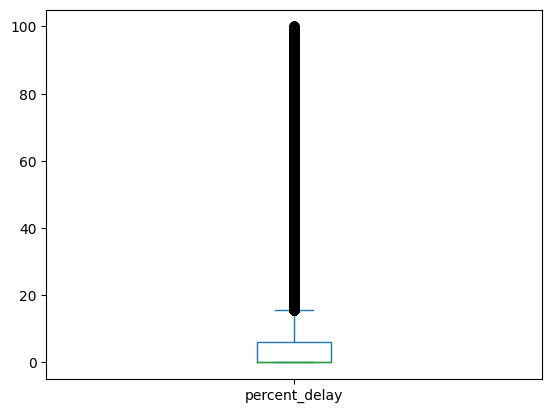

In [73]:
df['percent_delay'].plot.box()
minrow = df['percent_delay'].argmin()
df.iloc[minrow]


### Fixing negative flight time 
Some flights go past midnight as well, but the dataset don’t handle this. So a plain that took off 2013-01-01 23:57:00 and landed 2013-01-02 02:57:00 will come up in the dataset as 01-01 23:57:00 -> 01-01 02:57:00 (negative flight time)

In [53]:
for index, row in df.iterrows():
    #if air_time is negative
    if (row['arr_time']<row['dep_time']):
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)

df['air_time'] = df["arr_time"]-df["dep_time"]
df

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00
...,...,...,...,...,...,...,...,...,...
123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00,0 days 00:03:00
123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,-1 days +23:37:00
123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00,0 days 00:42:00
123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00,0 days 02:10:00


In [54]:
for index, row in df.iterrows():
    #if air_time is negative
    if (row['air_time'].days < 0):
        print(row)

In [55]:
#For every row in df
for index, row in df.iterrows():
    #if air_time is negative
    if (row['air_time'].days < 0):
        #Find the row with df.loc                      Take 24 hrs, - air_time + negative days (could be replaced with 1)
        #df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'] + datetime.timedelta(abs(row['air_time'].days)))
        df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'])

#### Delay

In [56]:
df['delay'] = df["arr_time"]-df["sched_arr_time"]
df

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00
...,...,...,...,...,...,...,...,...,...
123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00,0 days 00:03:00
123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,-1 days +23:37:00
123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00,0 days 00:42:00
123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00,0 days 02:10:00


In [57]:
df['delay'] = df['arr_time'] - df['sched_arr_time']
df

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00
...,...,...,...,...,...,...,...,...,...
123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00,0 days 00:03:00
123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,-1 days +23:37:00
123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00,0 days 00:42:00
123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00,0 days 02:10:00


In [58]:
# for each row in df
for index, row in df.iterrows():

    # if delay.days is negative
    if (row['delay'].days < 0):
        # change the delay from negative to 0, which is none since there is no delay
        df.loc[index, 'delay'] = datetime.timedelta(days=0,hours=0,minutes=0,seconds=0) 

df.head()

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,0 days 00:00:00
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,0 days 00:00:00


In [59]:
df["percent_delay"] = (100 * df['delay'])/df['air_time']
df

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,0 days 00:00:00,0.000000
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,0 days 00:00:00,0.000000
...,...,...,...,...,...,...,...,...,...,...
123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00,0 days 00:03:00,1.840491
123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,0 days 00:00:00,0.000000
123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00,0 days 00:42:00,26.415094
123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00,0 days 02:10:00,90.277778


In [ ]:
df['percent_delay'].plot.box()
minrow = df['percent_delay'].argmin()
df.iloc(minrow)

### Fixing negative flight time 
Some flights go past midnight as well, but the dataset don’t handle this. So a plain that took off 2013-01-01 23:57:00 and landed 2013-01-02 02:57:00 will come up in the dataset as 01-01 23:57:00 -> 01-01 02:57:00 (negative flight time)


In [17]:
for index, row in df.iterrows():
    #if air_time is negative
    if (row['arr_time']<row['dep_time']):
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)
        

#For every row in df
for index, row in df.iterrows():
    #if air_time is negative
    if (row['air_time'].days < 0):
        #Find the row with df.loc                      Take 24 hrs, - air_time + negative days (could be replaced with 1)
        #df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'] + datetime.timedelta(abs(row['air_time'].days)))
        df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'])

Calculating the following:

* air_time (dep_time - arr_time)
* Delay (arr_time – sched_arr_time)
* Delay (as a percent of air time (I have yet to produce a good solution for this))

In [18]:
df['air_time'] = df["arr_time"]-df["dep_time"]
df['delay'] = df["arr_time"]-df["sched_arr_time"]
df["percent_delay"] = (100 * df['delay'])/df['air_time']
# percent_delay = (100 * delay)/airtime


In [19]:
df

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944
...,...,...,...,...,...,...,...,...,...,...,...
121422,123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00,0 days 00:03:00,1.840491
121423,123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,-1 days +23:37:00,-41.071429
121424,123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00,0 days 00:42:00,26.415094
121425,123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00,0 days 02:10:00,90.277778


In [20]:
#For every row in df
for index, row in df.iterrows():
    #if air_time is negative
    if (row['air_time'].days < 0):
        #Find the row with df.loc                      Take 24 hrs, - air_time + negative days (could be replaced with 1)
        #df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'] + datetime.timedelta(abs(row['air_time'].days)))
        df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'])

In [21]:
df

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944
...,...,...,...,...,...,...,...,...,...,...,...
121422,123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00,0 days 00:03:00,1.840491
121423,123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,-1 days +23:37:00,-41.071429
121424,123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00,0 days 00:42:00,26.415094
121425,123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00,0 days 02:10:00,90.277778


In [22]:
df.to_csv("t2s.csv")

In [23]:
airt = df.loc[1, 'air_time']
dela = df.loc[1, 'delay']
print(airt, dela)

0 days 02:18:00 -1 days +23:35:00


In [24]:
(100*dela)/airt

-18.115942028985508

In [25]:
df["percent_delay"] = (100 * df['delay'])/df['air_time']

In [26]:
df.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944


In [27]:
df["percent_delay"]

0         14.932127
1        -18.115942
2         11.320755
3          9.595960
4         -4.968944
            ...    
121422     1.840491
121423   -41.071429
121424    26.415094
121425    90.277778
121426     1.923077
Name: percent_delay, Length: 121427, dtype: float64

In [28]:
df["percent_delay"].describe()

count    121373.000000
mean        -29.735566
std         206.591444
min       -2919.565217
25%         -14.838710
50%          -4.864865
75%           6.172840
max         100.000000
Name: percent_delay, dtype: float64

<Axes: >

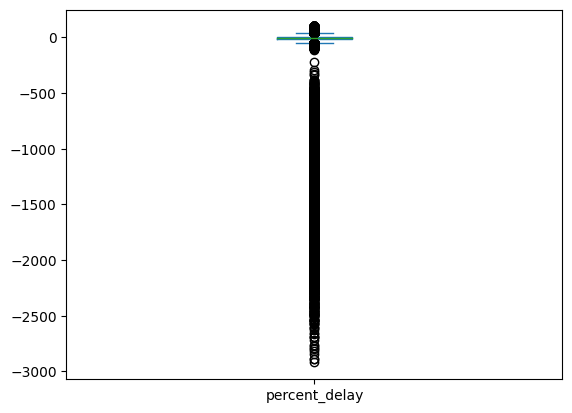

In [29]:
df["percent_delay"].plot.box()

In [30]:
minrow= df['percent_delay'].argmin()

In [31]:
df.iloc[minrow]

Unnamed: 0                      60788
datetime_val      2013-04-01 20:40:00
dep_time          2013-04-01 22:45:00
arr_time          2013-04-01 23:31:00
sched_arr_time    2013-04-02 21:54:00
flight                           1178
origin                            EWR
dest                              BOS
air_time              0 days 00:46:00
delay               -1 days +01:37:00
percent_delay            -2919.565217
Name: 59583, dtype: object

In [32]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df


In [33]:
df["percent_delay"] = remove_outlier(df["percent_delay"])

In [34]:
df["percent_delay"].describe()

count    109235.000000
mean         -3.763476
std          15.290651
min         -39.333333
25%         -13.636364
50%          -4.864865
75%           4.694836
max          42.424242
Name: percent_delay, dtype: float64

<Axes: >

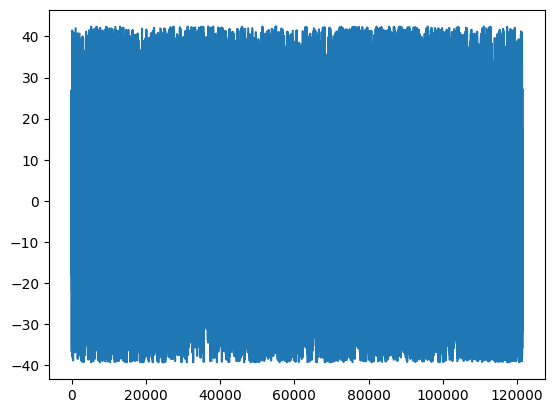

In [35]:
df["percent_delay"].plot.line()

<Axes: >

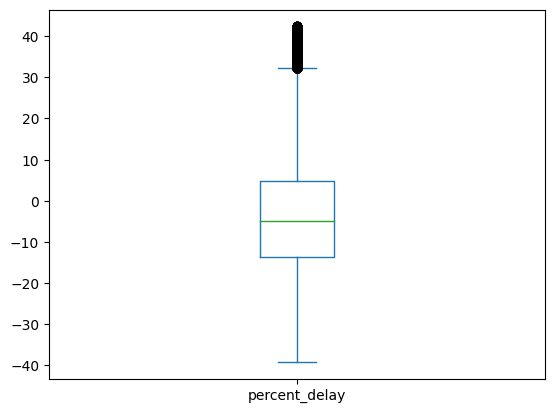

In [36]:
df["percent_delay"].plot.box()

In [37]:
df["percent_delay"].describe()

count    109235.000000
mean         -3.763476
std          15.290651
min         -39.333333
25%         -13.636364
50%          -4.864865
75%           4.694836
max          42.424242
Name: percent_delay, dtype: float64